In [7]:
import pandas as pd
import numpy as np 
import scipy.stats as stat
import seaborn as sns 
import matplotlib.pyplot as plt 




# Base N Encoding

In [2]:
import category_encoders as ce
import pandas as pd

#Create the dataframe
data=pd.DataFrame({'city':['Delhi','Mumbai','Hyderabad','Chennai','Bangalore','Delhi','Hyderabad','Mumbai','Agra']})

#Create an object for Base N Encoding
encoder= ce.BaseNEncoder(cols=['city'],base=2)
# The default Base for Base N is 2 which is equivalent to Binary Encoding.
#Original Data
enc = encoder.fit_transform(data)
enc

,city_0,city_1,city_2
0,0,0,1
1,0,1,0
2,0,1,1
3,1,0,0
4,1,0,1
5,0,0,1
6,0,1,1
7,0,1,0
8,1,1,0


In [2]:
l = "blue red green blue green green blue".split()
n = [20,12,13,16,18,17,-44]
b = [22,-33,55,44,-66,99,77] 


In [3]:
data = {
    "fav_color": l,
    "height" : [1.77,1.32,-1.81,1.56,1.64,1.61,1.73],
    "target_var" : [1,0,1,0,np.nan,0,0],
    "nnn" : n,
    "bbb" : b
}

df = pd.DataFrame(data)
df

,fav_color,height,target_var,nnn,bbb
0,blue,1.77,1.0,20,22
1,red,1.32,0.0,12,-33
2,green,-1.81,1.0,13,55
3,blue,1.56,0.0,16,44
4,green,1.64,NaN,18,-66
5,green,1.61,0.0,17,99
6,blue,1.73,0.0,-44,77


# Apply Function 

In [7]:
def go(val):
    return val + 2

def one_more(val):
    return f"add + {val}"

def str_int(val):
    return f"str_int + {val}"

In [8]:
go

<function __main__.go(val)>

In [23]:
df["cccc"] = df.target_var.apply(go)
# df["addd"] = df.fav_color.apply(one_more)
# df["bbbb"] = df.cccc.apply(str_int)
df

,fav_color,height,target_var,cccc
0,blue,1.77,1.0,3.0
1,red,1.32,0.0,2.0
2,green,1.81,1.0,3.0
3,blue,1.56,0.0,2.0
4,green,1.64,NaN,NaN
5,green,1.61,0.0,2.0
6,blue,1.73,0.0,2.0


In [5]:
from category_encoders import TargetEncoder
tc = TargetEncoder()
tc.fit_transform(df["fav_color"], df["target_var"])


,fav_color
0,0.413860
1,0.372811
2,0.465349
3,0.413860
4,0.465349
5,0.465349
6,0.413860


In [1]:
l = [1,2,3,4,5,6]
for i in l:
    if i == 3 :
        print(i)

3


# Log Normal

In [5]:
mu = 3
sigma = 1
log_normal = np.random.lognormal(mu,sigma,500)

<Axes: ylabel='Count'>

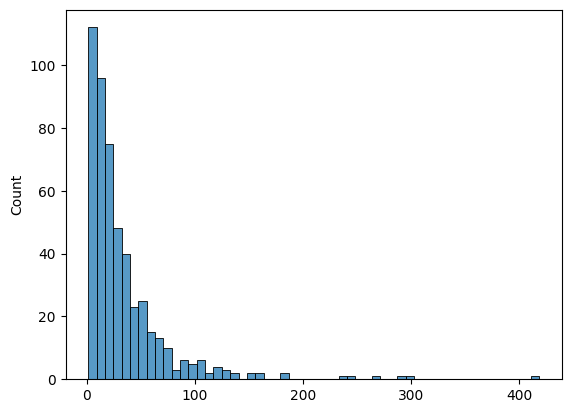

In [6]:
import seaborn as sns 
sns.histplot(log_normal)

<Axes: ylabel='Count'>

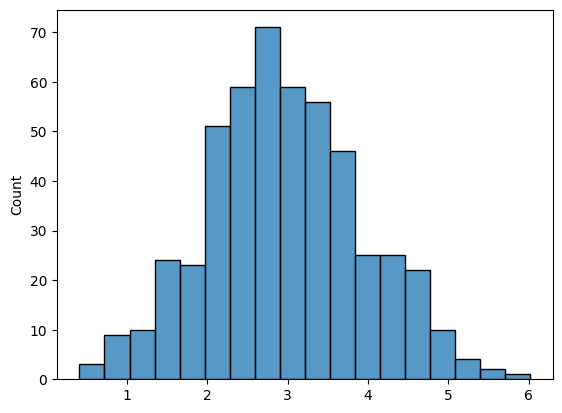

In [10]:
aa = np.log(np.random.lognormal(mu,sigma,500))
sns.histplot(aa)

In [3]:
a = np.array([1, 7, 5, 4, 6, 3])

In [7]:
pd.cut(a,5)

[(0.994, 2.2], (5.8, 7.0], (4.6, 5.8], (3.4, 4.6], (5.8, 7.0], (2.2, 3.4]]
Categories (5, interval[float64, right]): [(0.994, 2.2] < (2.2, 3.4] < (3.4, 4.6] < (4.6, 5.8] < (5.8, 7.0]]

In [53]:
aaa = np.random.randint(1,100,20)

In [51]:
np.arange(0,110,20)

array([  0,  20,  40,  60,  80, 100])

In [59]:
s = pd.cut(aaa,bins=np.arange(0,110,20),labels=['10 to 20', '21 to 40', '41 to 60',
                            '61 to 80', '80 to 100','101 to 120'])

print(aaa)

print(s.value_counts())

ValueError: Bin labels must be one fewer than the number of bin edges

In [58]:
s = pd.cut(aaa,bins=np.arange(0,130,20),labels=['10 to 20', '21 to 40', '41 to 60',
                            '61 to 80', '80 to 100','101 to 120'])

print(aaa)

print(s.value_counts())

[ 3 89 27 95 84 92 64 38 81 33 56 55 41 58 70 45 83 82 78 88]
10 to 20      1
21 to 40      3
41 to 60      5
61 to 80      3
80 to 100     8
101 to 120    0
Name: count, dtype: int64


# statistics

In [2]:
sample_mean = 110 
population_mean = 100 
population_std = 15 
n = 50 



In [3]:
z_test = (sample_mean - population_mean)/(population_std/np.sqrt(n))
z_test

4.714045207910317

In [5]:
CI = 1 - 0.95
CI

0.050000000000000044

In [7]:
z_critical = stat.norm.ppf(0.95)
z_critical

1.6448536269514722

In [24]:
s = np.random.randint(0,100,size=200)
s.shape

(200,)

<Axes: ylabel='Density'>

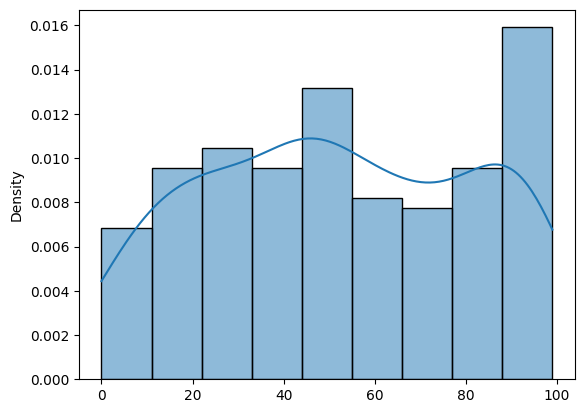

In [25]:
sns.histplot(s,kde=True,stat='density')

In [26]:
print(np.mean(s))
print(np.std(s))

52.005
29.207789628795947


In [23]:
stat.normaltest(s)

NormaltestResult(statistic=92.34893792105011, pvalue=8.844696309822662e-21)

In [28]:
import statistics as st 

In [33]:
n = st.NormalDist(mu=100,sigma=15)
samples = n.samples(100)
print(np.mean(samples))
print(np.std(samples))

100.87508367249829
15.655149077721546


In [35]:
import random 
sam = random.sample(samples,70)
len(sam)

70

In [36]:
print(np.mean(samples))
print(np.std(samples))
print(np.mean(sam))

100.87508367249829
15.655149077721546
103.31478759583082


<Axes: ylabel='Count'>

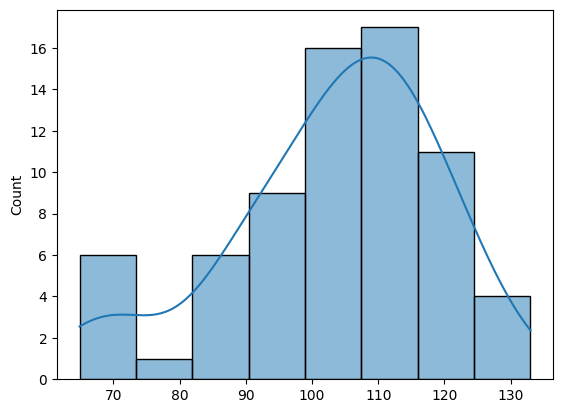

In [37]:
sns.histplot(sam,kde=True)

In [38]:
stat.normaltest(samples)

NormaltestResult(statistic=3.977078778883558, pvalue=0.13689523011006974)

In [40]:
stat.normaltest(sam)


NormaltestResult(statistic=6.121562205906246, pvalue=0.04685108540266663)

In [41]:
from statsmodels.stats.weightstats import ztest

In [42]:
ztest(sam,value=100,alternative='larger')

(1.7654606936008252, 0.03874318533410667)

In [47]:
int(66.99)

66

# Size function

In [10]:
df = pd.DataFrame({'col1': [11, np.nan,], 'col2': [4,"5"]})
df.size

4

In [11]:
df.isna().sum().sum()

1

In [12]:
df.isna().sum().sum() / df.size 

0.25

In [13]:
1 -  (df.isna().sum().sum() / df.size )


0.75

# where 

In [ ]:
# df_main["days_employed"] = np.where(df_main["days_employed"]<0, df_main["days_employed"]* -1, df_main["days_employed"])

In [6]:
df

,fav_color,height,target_var
0,blue,1.77,1.0
1,red,1.32,0.0
2,green,1.81,1.0
3,blue,1.56,0.0
4,green,1.64,NaN
5,green,1.61,0.0
6,blue,1.73,0.0


In [ ]:
def fill(store_id):
    try:

        return target_var[store_id].values[0]
    except:
        return np.nan 
    
df["non_null_primary_category"] = df.store_id.apply(fill)

# Log Transform

In [7]:
dd = np.random.randint(10,30,10)
dd = list(dd)
dd.append(150)
dd.append(-10)
dd.append(0)
dd.append(np.nan)

log_df = pd.DataFrame(dd,columns=["nums"])
log_df

,nums
0,23.0
1,26.0
2,26.0
3,13.0
4,14.0
5,22.0
6,21.0
7,12.0
8,16.0
9,29.0


<Axes: ylabel='Count'>

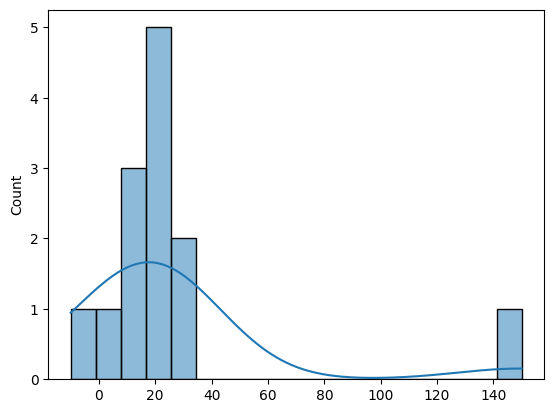

In [47]:
sns.histplot(dd,kde=True)

In [48]:
dd_log  = np.log(log_df)
dd_log

d:\Faisal\Projects\PDT_project\doord_env\lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
d:\Faisal\Projects\PDT_project\doord_env\lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,nums
0,3.367296
1,3.295837
2,3.044522
3,3.178054
4,2.564949
5,2.944439
6,2.772589
7,3.178054
8,2.302585
9,3.135494


<Axes: ylabel='Count'>

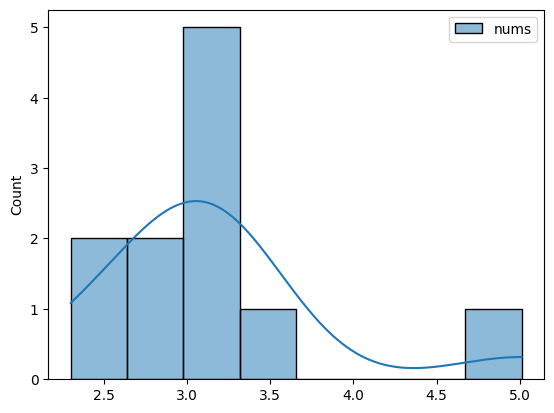

In [49]:
sns.histplot(dd_log,kde=True)

# Function Transformer

In [4]:
from sklearn.preprocessing import FunctionTransformer 
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline 


In [50]:
features = ["nums"]
num_imp = Pipeline(steps=[
    ("log_transform", FunctionTransformer(func=(np.log1p)))
])

preprosser = ColumnTransformer(transformers=[
    ("log_transform", num_imp, features)
],remainder='passthrough')

tran = preprosser.fit_transform(log_df)
tran

d:\Faisal\Projects\PDT_project\doord_env\lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


array([[3.40119738],
       [3.33220451],
       [3.09104245],
       [3.21887582],
       [2.63905733],
       [2.99573227],
       [2.83321334],
       [3.21887582],
       [2.39789527],
       [3.17805383],
       [5.01727984],
       [       nan],
       [0.        ],
       [       nan]])

In [44]:
log_df.skew()

nums    3.300014
dtype: float64

# Power Transform

In [5]:
from sklearn.preprocessing import PowerTransformer

In [17]:
features = ["nums"]
num_imp = Pipeline(steps=[
    ("log_transform", PowerTransformer(method='yeo-johnson'))
])

preprosser = ColumnTransformer(transformers=[
    ("log", num_imp, features)
],remainder='passthrough')

transformer = Pipeline(steps=[("preprocessor", preprosser)])
transformer.set_output(transform='pandas')

tran1 = transformer.fit_transform(log_df)
tran1


,log__nums
0,0.109415
1,0.196449
2,0.196449
3,-0.209578
4,-0.175079
5,0.079673
6,0.049531
7,-0.244844
8,-0.108123
9,0.280555


In [73]:
transformer.get_feature_names_out()

array(['log__nums'], dtype=object)

In [12]:
transformer.set_output(transform='pandas')

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log',
                                                  Pipeline(steps=[('log_transform',
                                                                   PowerTransformer())]),
                                                  ['nums'])]))])

In [11]:
tran1

array([[ 0.10941516],
       [ 0.19644864],
       [ 0.19644864],
       [-0.20957809],
       [-0.17507866],
       [ 0.0796729 ],
       [ 0.04953059],
       [-0.24484362],
       [-0.10812286],
       [ 0.28055479],
       [ 2.74630328],
       [-2.11974761],
       [-0.80100316],
       [        nan]])

In [67]:
transformer.lambdas_

AttributeError: 'Pipeline' object has no attribute 'lambdas_'

In [53]:
features = ["nums"]
num_imp = Pipeline(steps=[
    ("log_transform", PowerTransformer(method='box-cox'))
])

preprosser = ColumnTransformer(transformers=[
    ("log_transform", num_imp, features)
],remainder='passthrough')

tran2 = preprosser.fit_transform(log_df)
tran2

ValueError: The Box-Cox transformation can only be applied to strictly positive data

In [2]:
index = pd.MultiIndex.from_tuples([('one', 'a'), ('one', 'b'),
                                   ('two', 'a'), ('two', 'b')])
s = pd.Series(np.arange(1.0, 5.0), index=index)
s

one  a    1.0
     b    2.0
two  a    3.0
     b    4.0
dtype: float64

# Checking redunduncies and correlation of every column with each other 

In [18]:
df

,fav_color,height,target_var,nnn,bbb
0,blue,1.77,1.0,20,22
1,red,1.32,0.0,12,-33
2,green,-1.81,1.0,13,55
3,blue,1.56,0.0,16,44
4,green,1.64,NaN,18,-66
5,green,1.61,0.0,17,99
6,blue,1.73,0.0,-44,77


In [19]:
c = df[["height","target_var","nnn","bbb"]]
c

,height,target_var,nnn,bbb
0,1.77,1.0,20,22
1,1.32,0.0,12,-33
2,-1.81,1.0,13,55
3,1.56,0.0,16,44
4,1.64,NaN,18,-66
5,1.61,0.0,17,99
6,1.73,0.0,-44,77


In [12]:
c.corr()

,height,target_var,nnn,bbb
height,1.000000,-0.580811,-0.138447,-0.156873
target_var,-0.580811,1.000000,0.342504,-0.092319
nnn,-0.138447,0.342504,1.000000,-0.357540
bbb,-0.156873,-0.092319,-0.357540,1.000000


In [7]:
c.corr().abs()

,height,target_var,nnn,bbb
height,1.000000,0.580811,0.138447,0.156873
target_var,0.580811,1.000000,0.342504,0.092319
nnn,0.138447,0.342504,1.000000,0.357540
bbb,0.156873,0.092319,0.357540,1.000000


In [13]:
auc_corr = c.corr().abs().unstack()
auc_corr

height      height        1.000000
            target_var    0.580811
            nnn           0.138447
            bbb           0.156873
target_var  height        0.580811
            target_var    1.000000
            nnn           0.342504
            bbb           0.092319
nnn         height        0.138447
            target_var    0.342504
            nnn           1.000000
            bbb           0.357540
bbb         height        0.156873
            target_var    0.092319
            nnn           0.357540
            bbb           1.000000
dtype: float64

In [14]:
df.shape[1] # columns number 

5

In [47]:
pairs_to_drop = []
for i in range(0, c.shape[1]):
    for j in range(0,i+1):
        pairs_to_drop.append((c.columns[i],c.columns[j]))

In [45]:
c.shape

(7, 4)

In [46]:
c.columns

Index(['height', 'target_var', 'nnn', 'bbb'], dtype='object')

In [48]:
pairs_to_drop # categorical column is also present , we have to take only numerical values

[('height', 'height'),
 ('target_var', 'height'),
 ('target_var', 'target_var'),
 ('nnn', 'height'),
 ('nnn', 'target_var'),
 ('nnn', 'nnn'),
 ('bbb', 'height'),
 ('bbb', 'target_var'),
 ('bbb', 'nnn'),
 ('bbb', 'bbb')]

In [17]:
au_corr = c.corr().abs().unstack().sort_values(ascending=False)
au_corr

height      height        1.000000
target_var  target_var    1.000000
nnn         nnn           1.000000
bbb         bbb           1.000000
height      target_var    0.580811
target_var  height        0.580811
nnn         bbb           0.357540
bbb         nnn           0.357540
target_var  nnn           0.342504
nnn         target_var    0.342504
height      bbb           0.156873
bbb         height        0.156873
height      nnn           0.138447
nnn         height        0.138447
target_var  bbb           0.092319
bbb         target_var    0.092319
dtype: float64

In [50]:
pairs_to_drop # we are removing one of (a,b) (b,a)

[('height', 'height'),
 ('target_var', 'height'),
 ('target_var', 'target_var'),
 ('nnn', 'height'),
 ('nnn', 'target_var'),
 ('nnn', 'nnn'),
 ('bbb', 'height'),
 ('bbb', 'target_var'),
 ('bbb', 'nnn'),
 ('bbb', 'bbb')]

In [49]:
auc_corr.drop(labels=pairs_to_drop).sort_values(ascending=False) 

height      target_var    0.580811
nnn         bbb           0.357540
target_var  nnn           0.342504
height      bbb           0.156873
            nnn           0.138447
target_var  bbb           0.092319
dtype: float64

In [37]:
def get_redundant_pair(df):
    pairs_to_drop = set()
    # ll = []
    for i in range(0,df.shape[1]):
        for j in range(0,i+1):
            pairs_to_drop.add((df.columns[i], df.columns[j]))
            # ll.append((df.columns[i], df.columns[j]))

    return pairs_to_drop



In [35]:
get_redundant_pair(c)

([('height', 'height'),
  ('target_var', 'height'),
  ('target_var', 'target_var'),
  ('nnn', 'height'),
  ('nnn', 'target_var'),
  ('nnn', 'nnn'),
  ('bbb', 'height'),
  ('bbb', 'target_var'),
  ('bbb', 'nnn'),
  ('bbb', 'bbb')],
 {('bbb', 'bbb'),
  ('bbb', 'height'),
  ('bbb', 'nnn'),
  ('bbb', 'target_var'),
  ('height', 'height'),
  ('nnn', 'height'),
  ('nnn', 'nnn'),
  ('nnn', 'target_var'),
  ('target_var', 'height'),
  ('target_var', 'target_var')})

In [33]:
get_redundant_pair(c)

[('height', 'height'),
 ('target_var', 'height'),
 ('target_var', 'target_var'),
 ('nnn', 'height'),
 ('nnn', 'target_var'),
 ('nnn', 'nnn'),
 ('bbb', 'height'),
 ('bbb', 'target_var'),
 ('bbb', 'nnn'),
 ('bbb', 'bbb')]

In [38]:
def get_top_abs_correlation(df,n):
    au_corr = df.corr().abs().unstack()
    label_to_drop = get_redundant_pair(df)
    au1_corr = au_corr.drop(labels=label_to_drop).sort_values(ascending=False)
    # print(au_corr)
    print(label_to_drop)
    # print(au1_corr)
    # return au1_corr


get_top_abs_correlation(c,15)


{('nnn', 'height'), ('nnn', 'target_var'), ('height', 'height'), ('bbb', 'target_var'), ('bbb', 'height'), ('nnn', 'nnn'), ('bbb', 'nnn'), ('bbb', 'bbb'), ('target_var', 'target_var'), ('target_var', 'height')}


In [70]:
au_corr[('nnn', 'height')]

0.13844738669571677

In [39]:
get_redundant_pair(c)

{('bbb', 'bbb'),
 ('bbb', 'height'),
 ('bbb', 'nnn'),
 ('bbb', 'target_var'),
 ('height', 'height'),
 ('nnn', 'height'),
 ('nnn', 'nnn'),
 ('nnn', 'target_var'),
 ('target_var', 'height'),
 ('target_var', 'target_var')}

In [28]:
get_top_abs_correlation(c,15)

height      target_var    0.580811
nnn         bbb           0.357540
target_var  nnn           0.342504
height      bbb           0.156873
            nnn           0.138447
target_var  bbb           0.092319
dtype: float64

In [42]:
set(c.corr().abs().unstack().sort_values(ascending=False))

{0.09231861823449951,
 0.13844738669571677,
 0.1568727696236982,
 0.34250397631184804,
 0.35754015370901815,
 0.5808112050894059,
 1.0}

In [60]:
lp = [("lop"), ("mop"),("lop")]
set(lp)

{'lop', 'mop'}

In [67]:
lp1 = [("lop"), ("mop"),("mmm"),("mop")]
set(lp1)

{'lop', 'mmm', 'mop'}

In [68]:
pairs_to_remove = []
for i in range(len(lp1)):
    for j in range(0,i+1):
        pairs_to_remove.append((lp1[i],lp1[j]))
pairs_to_remove

[('lop', 'lop'),
 ('mop', 'lop'),
 ('mop', 'mop'),
 ('mmm', 'lop'),
 ('mmm', 'mop'),
 ('mmm', 'mmm'),
 ('mop', 'lop'),
 ('mop', 'mop'),
 ('mop', 'mmm'),
 ('mop', 'mop')]

In [69]:
set(pairs_to_remove)

{('lop', 'lop'),
 ('mmm', 'lop'),
 ('mmm', 'mmm'),
 ('mmm', 'mop'),
 ('mop', 'lop'),
 ('mop', 'mmm'),
 ('mop', 'mop')}

# Scatter Matrix 

In [6]:
from pandas.plotting import scatter_matrix 
 

In [9]:
cols = c.columns

array([[<Axes: xlabel='height', ylabel='height'>,
        <Axes: xlabel='target_var', ylabel='height'>,
        <Axes: xlabel='nnn', ylabel='height'>,
        <Axes: xlabel='bbb', ylabel='height'>],
       [<Axes: xlabel='height', ylabel='target_var'>,
        <Axes: xlabel='target_var', ylabel='target_var'>,
        <Axes: xlabel='nnn', ylabel='target_var'>,
        <Axes: xlabel='bbb', ylabel='target_var'>],
       [<Axes: xlabel='height', ylabel='nnn'>,
        <Axes: xlabel='target_var', ylabel='nnn'>,
        <Axes: xlabel='nnn', ylabel='nnn'>,
        <Axes: xlabel='bbb', ylabel='nnn'>],
       [<Axes: xlabel='height', ylabel='bbb'>,
        <Axes: xlabel='target_var', ylabel='bbb'>,
        <Axes: xlabel='nnn', ylabel='bbb'>,
        <Axes: xlabel='bbb', ylabel='bbb'>]], dtype=object)

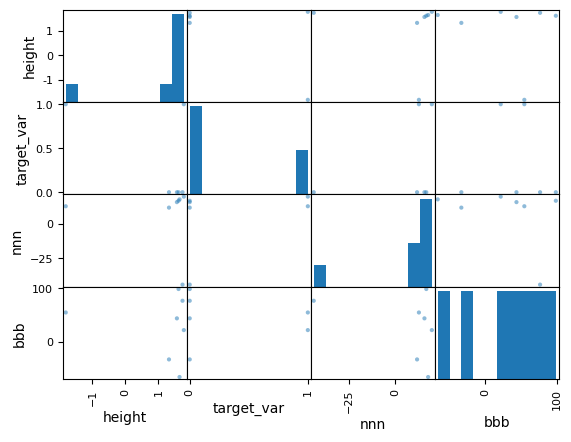

In [10]:
scatter_matrix(c[cols])

# Power Transform 2 

In [22]:
features = ["height","target_var","nnn","bbb"]

imp = Pipeline(steps=[
    ("log", PowerTransformer(method="yeo-johnson"))
])

ct = ColumnTransformer(transformers=[
    ("log", imp,features)
],remainder='passthrough')

t = Pipeline(steps=[("pre", ct)])
t.set_output(transform='pandas')
transformed = t.fit_transform(df)
transformed


,log__height,log__target_var,log__nnn,log__bbb,remainder__fav_color
0,0.903707,1.414214,1.160019,-0.260468,blue
1,-0.446185,-0.707107,-0.396430,-1.152343,red
2,-2.241485,1.414214,-0.225499,0.441185,green
3,0.205691,-0.707107,0.329223,0.203054,blue
4,0.456794,NaN,0.732119,-1.578524,green
5,0.360550,-0.707107,0.527474,1.420750,green
6,0.760928,-0.707107,-2.126907,0.926346,blue


# Outliers 

In [ ]:
df1 = df.copy()
def remove_outliers_IQR(col):
    # Finding the IQR
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df1[col] = np.where(df1[col]>upper_limit, upper_limit, np.where(df1[col]<lower_limit,lower_limit,df1[col]))
    return df1[df1[col] > upper_limit]

In [15]:
nr = np.random.normal(loc=100,scale=3,size=100)
# nr = list(nr)

In [22]:
type(nr)

numpy.ndarray

In [ ]:
# nr.append(5000)

# Appending in array

In [32]:
nr = np.append(nr, [150,200,210,350])

# Deleting from Array

In [33]:
# modified_array = np.delete(original_array, np.where(original_array == value_to_delete))
modified_array = np.delete(nr, np.where(nr == 5000))


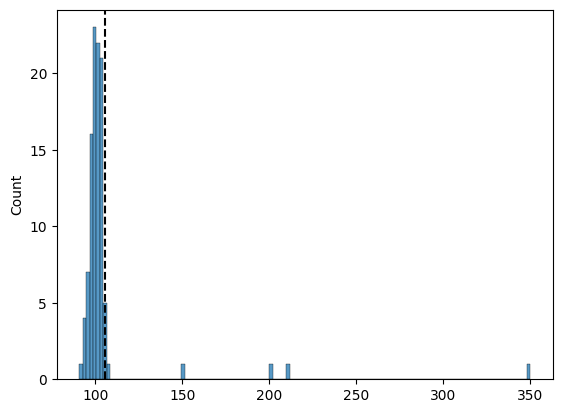

In [34]:
sns.histplot(modified_array)
plt.axvline(modified_array.mean(),color='k' , linestyle='dashed')

In [38]:
up = modified_array.mean() + (3 * modified_array.std())
low = modified_array.mean() - (3 * modified_array.std())

In [39]:
up , low

(191.12037416332058, 19.372562819708577)

In [43]:
modified_array[modified_array > up]

array([200., 210., 350.])

In [59]:
modified_array.shape

(104,)

In [131]:
a = pd.DataFrame(modified_array, columns=["arr"])

In [132]:
s25 = a["arr"].quantile(0.25)
s75 = a["arr"].quantile(0.75)
IQR = s75 - s25 
u = s75 + 1.5 * IQR 
l = s25 - 1.5 * IQR 
u , l 

(110.00338905918721, 91.60751155401505)

In [93]:
a[a["arr"] > u] 

,arr
100,150.0
101,200.0
102,210.0
103,350.0


In [94]:
a[a["arr"]< l ] 

,arr
76,90.781193


<Axes: ylabel='arr'>

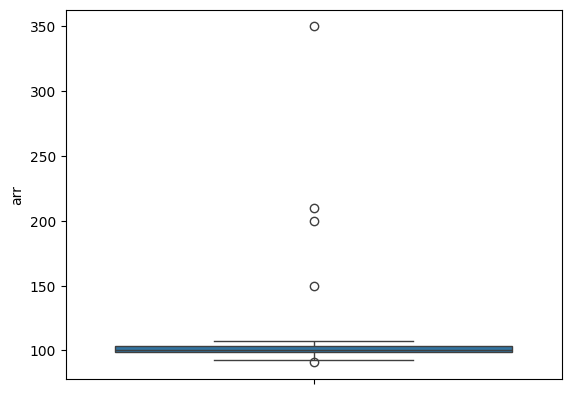

In [64]:
sns.boxplot(a["arr"])

# Trimming outlier 

In [56]:
dr = a[a["arr"] > u].index

In [57]:
a.drop(dr,inplace=True)

<Axes: ylabel='arr'>

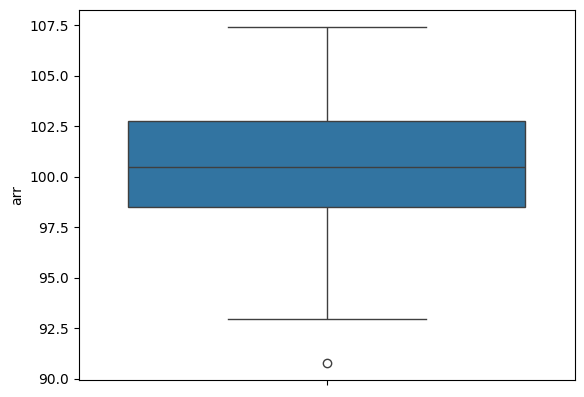

In [58]:
sns.boxplot(a["arr"])

# Capping Outlier 

In [65]:
a[a["arr"] > u]

,arr
100,150.0
101,200.0
102,210.0
103,350.0


In [66]:
a[a["arr"]<l]

,arr
76,90.781193


In [71]:
a["arr"] = np.where(a["arr"]>u, u,np.where(a["arr"]<l, l, a["arr"]))

<Axes: ylabel='arr'>

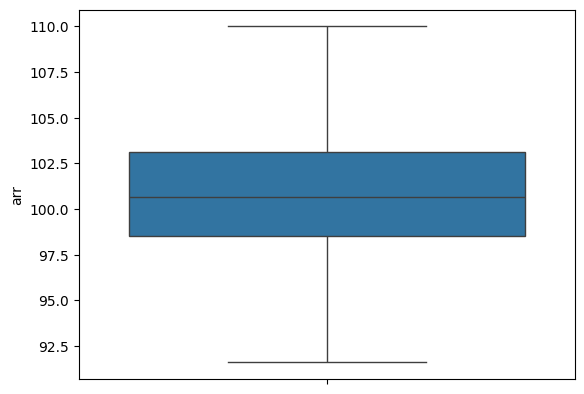

In [72]:
sns.boxplot(a["arr"])

In [73]:
a[a["arr"] > u]


,arr


In [95]:
a[a["arr"] < l]


,arr
76,90.781193


# Function for removing outlier 

In [105]:
aa = a[a["arr"] > u]
aq = aa.index.tolist()
aq

[100, 101, 102, 103]

In [106]:
ab = a[a["arr"] < l]
aw = ab.index.tolist()
aw

[76]

In [107]:
aq + aw 

[100, 101, 102, 103, 76]

In [133]:
def outlier_IQR(df, col):

    percentile_25 = df[col].quantile(0.25)
    percentile_75 = df[col].quantile(0.75)
    IQR = percentile_75 - percentile_25 
    upper_limit = percentile_75 + 1.5 * IQR 
    lower_limit = percentile_25 - 1.5 * IQR 

    user = input("Trim or Capping").lower()
    if user == "trim":
        x = df[df[col] > upper_limit].index.tolist()
        y = df[df[col] < lower_limit].index.tolist()
        df.drop(x+y,inplace=True)
    else:
        df[col] = np.where(df[col] > upper_limit, upper_limit, np.where(df[col]<lower_limit, lower_limit, df[col]))
        
    return (df[df[col] > upper_limit]) | (df[df[col] < lower_limit])



<Axes: ylabel='arr'>

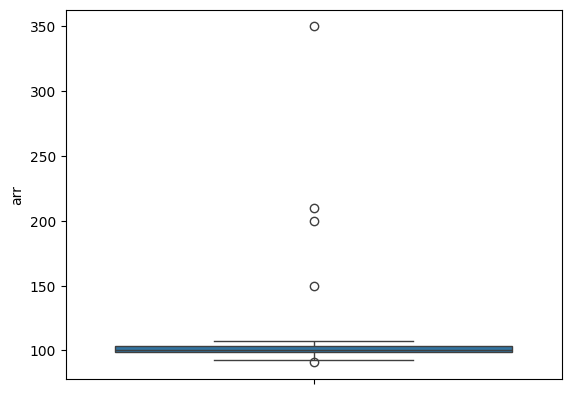

In [134]:
sns.boxplot(a["arr"])

In [135]:
outlier_IQR(a,"arr")

,arr


<Axes: ylabel='arr'>

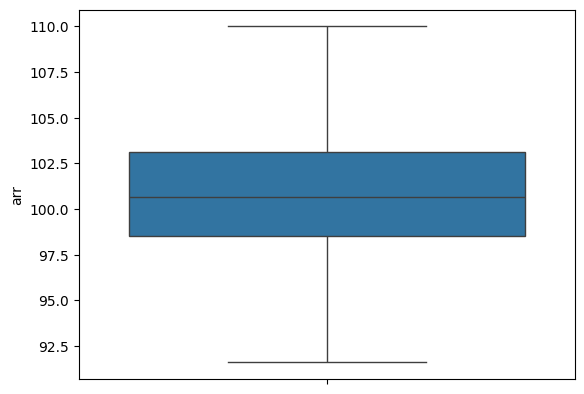

In [136]:
sns.boxplot(a["arr"])

In [137]:
a.columns

Index(['arr'], dtype='object')

In [140]:
def f(val):
    user = input(f"Column --> {i}   ")
for i in a.columns:
    f(a)